In [12]:
import os
import json
import uuid
import pandas as pd
import torch
import torchaudio
from torchvision.models import resnet18
from b2aiprep.process import Audio, specgram, plot_spectrogram
import IPython.display as Ipd
from torchsummary import summary

In [13]:
def determine_is_stridor(path):
    """
    Determine if the path should be marked as stridor based on the parent folder.
    """
    for part in path.split(os.sep):
        if part.upper() in ["CONTROL", "CONTROLS"]:
            return False
    return True

def generate_recording_objects(root_path, output_json):
    recordings = []

    # Traverse the directory structure
    for root, dirs, files in os.walk(root_path):
        # Check if there are wav files in the current directory
        wav_files = [file for file in files if file.endswith('.wav')]
        if wav_files:
            # Get the parent folder name
            parent_folder = os.path.basename(root)
            # Determine the isStridor value
            is_stridor = determine_is_stridor(root)
            
            for wav_file in wav_files:
                # Generate a unique ID for each player-session-recording combination
                uid = str(uuid.uuid4())
                # Extract the recording label (base name without extension)
                recording_label = os.path.splitext(wav_file)[0]
                # Create the entry for the current recording
                entry = {
                    "uid": uid,
                    "name": parent_folder,
                    "recording": os.path.join(root, wav_file),  # Include the full path
                    "recording_label": recording_label,
                    "isStridor": is_stridor
                }
                recordings.append(entry)
                
    return recordings

In [14]:
def filter_recordings_by_label(data, label_prefix):
    """
    Filter recordings to only include those with recording_label starting with the specified prefix.
    Exclude specific labels when the prefix is 'FIMO'.
    """
    exclude_labels = {"FIMO": ["FIMOcricoid", "FIMOthyroid", "FIMOC", "FIMOT"]}

    filtered_data = []
    for recording in data:
        if recording['recording_label'].startswith(label_prefix):
            if label_prefix == "FIMO" and recording['recording_label'] in exclude_labels["FIMO"]:
                continue
            filtered_data.append(recording)

    return filtered_data

In [15]:
# Usage
root_path = 'C:\\Users\\namac\\Studies\\B2AI\\STRIDOR FULL ANON-selected\\Data files'  # Replace with the actual path to your folders
output_json = 'output_individual.json'  # Replace with the desired output JSON file name
data = generate_recording_objects(root_path, output_json)

print(f"rcordings: {data}")

rcordings: [{'uid': '69778ede-4b98-4306-979f-46b313e4c443', 'name': 'Patient 1', 'recording': 'C:\\Users\\namac\\Studies\\B2AI\\STRIDOR FULL ANON-selected\\Data files\\OLD methods\\INITIAL (Avid, mostly asynchronous)\\Patient 1\\FEMCcricoid.wav', 'recording_label': 'FEMCcricoid', 'isStridor': True}, {'uid': '7682edc3-8f64-4a3f-82f8-abca766bc852', 'name': 'Patient 1', 'recording': 'C:\\Users\\namac\\Studies\\B2AI\\STRIDOR FULL ANON-selected\\Data files\\OLD methods\\INITIAL (Avid, mostly asynchronous)\\Patient 1\\FEMOcricoid.wav', 'recording_label': 'FEMOcricoid', 'isStridor': True}, {'uid': 'ca43972f-d940-4bf1-93c8-dd73881aac05', 'name': 'Patient 1', 'recording': 'C:\\Users\\namac\\Studies\\B2AI\\STRIDOR FULL ANON-selected\\Data files\\OLD methods\\INITIAL (Avid, mostly asynchronous)\\Patient 1\\FEMOthyroid.wav', 'recording_label': 'FEMOthyroid', 'isStridor': True}, {'uid': '2cc747da-0f46-43f1-a38c-438f87b66eb0', 'name': 'Patient 1', 'recording': 'C:\\Users\\namac\\Studies\\B2AI\\STRID

In [16]:
# Filter the data to only include recordings with recording_label starting with "FIMO"
filtered_data = filter_recordings_by_label(data, "FIMO")

print(f"filtered recordings: {filtered_data}")

filtered recordings: [{'uid': '08b0a64f-9fe6-4a1a-b24b-7375a61599b7', 'name': 'Patient 2', 'recording': 'C:\\Users\\namac\\Studies\\B2AI\\STRIDOR FULL ANON-selected\\Data files\\OLD methods\\INITIAL (Avid, mostly asynchronous)\\Patient 2\\FIMO12inch.wav', 'recording_label': 'FIMO12inch', 'isStridor': True}, {'uid': '60b469e1-1487-4d7d-a726-05c4bb2f435c', 'name': 'Patient 3', 'recording': 'C:\\Users\\namac\\Studies\\B2AI\\STRIDOR FULL ANON-selected\\Data files\\OLD methods\\INITIAL (Avid, mostly asynchronous)\\Patient 3\\FIMO12inch.wav', 'recording_label': 'FIMO12inch', 'isStridor': True}, {'uid': '3bf44d1d-3061-442f-8890-1fe5cdc1a8c4', 'name': 'Patient 4', 'recording': 'C:\\Users\\namac\\Studies\\B2AI\\STRIDOR FULL ANON-selected\\Data files\\OLD methods\\INITIAL (Avid, mostly asynchronous)\\Patient 4\\FIMO12inch.wav', 'recording_label': 'FIMO12inch', 'isStridor': True}, {'uid': 'e0ac3d3f-5c5b-436c-8b92-739a5c95e552', 'name': 'Patient 6', 'recording': 'C:\\Users\\namac\\Studies\\B2AI\\S

In [17]:
df = pd.DataFrame(data)

print(f"df: {df}")

df:                                       uid        name  \
0    69778ede-4b98-4306-979f-46b313e4c443   Patient 1   
1    7682edc3-8f64-4a3f-82f8-abca766bc852   Patient 1   
2    ca43972f-d940-4bf1-93c8-dd73881aac05   Patient 1   
3    2cc747da-0f46-43f1-a38c-438f87b66eb0   Patient 1   
4    932ffa1d-9213-4072-bcae-abaf57551c30   Patient 1   
..                                    ...         ...   
716  61276330-05af-4838-8620-f936713c0eeb  Patient 42   
717  c8cf594c-7ee4-4f7a-9c16-6914e859f81d  Patient 42   
718  09e5f627-c2f2-4788-9885-b1083b8557e2  Patient 42   
719  2cbd5eca-e780-441a-804a-08b89fdb9b33  Patient 42   
720  4f2f0737-57e6-465d-849f-871c489ad8d9  Patient 42   

                                             recording recording_label  \
0    C:\Users\namac\Studies\B2AI\STRIDOR FULL ANON-...     FEMCcricoid   
1    C:\Users\namac\Studies\B2AI\STRIDOR FULL ANON-...     FEMOcricoid   
2    C:\Users\namac\Studies\B2AI\STRIDOR FULL ANON-...     FEMOthyroid   
3    C:\Users\n

In [18]:
class MySpecgramDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, segment_size=3):
        self.dataframe = dataframe
        self.segment_size = segment_size
        
        # Ensure the DataFrame has the necessary columns
        required_columns = ['uid', 'recording', 'recording_label', 'isStridor']
        for col in required_columns:
            if col not in dataframe.columns:
                raise ValueError(f"DataFrame is missing required column: {col}")

        # Extract necessary information from the DataFrame
        self.audio_files = dataframe['recording'].tolist()
        self.labels = dataframe['isStridor'].tolist()
        self.uids = dataframe['uid'].tolist()
        self.recording_labels = dataframe['recording_label'].tolist()

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        uid = self.uids[idx]
        audio_file = self.audio_files[idx]
        label = self.labels[idx]
        recording_label = self.recording_labels[idx]

        try:
            audio = Audio.from_file(self.audio_files[idx])
            audio = audio.to_16khz()
            # get middle K seconds if audio is too long, pad with zeros if it is too short
            if audio.signal.size(0) > self.segment_size*16000:
                d = (audio.signal.size(0)-self.segment_size*16000)//2
                audio.signal = audio.signal[d:d+self.segment_size*16000]
            else:
                audio.signal = torch.nn.functional.pad(audio.signal, (0,self.segment_size*16000-audio.signal.size(0)), mode='constant', value=0)
                
            win_length = 30
            hop_length = 10
            nfft = 512
            features_specgram = specgram(audio, win_length=win_length, hop_length=hop_length, n_fft=nfft)
            features_specgram = 10.0 * torch.log10(torch.maximum(features_specgram, torch.full(features_specgram.size(), fill_value=1e-10))).T

        except Exception as e:
            print(f"Error loading {audio_file}: {e}")
            return self.__getitem__((idx + 1) % len(self))

        # Convert the label to a tensor
        label = torch.tensor(label, dtype=torch.float32)

        return {'uid': uid, 'signal': features_specgram, 'isStridor': label, 'recording_label': recording_label}

dataset: <__main__.MySpecgramDataset object at 0x0000029C3784E060>


['RegAvid', 'FEMC12inch', 'DeepAvid', 'FIMOiPad', 'FIMOcricoid', 'RMCthyroid', 'RPcricoid', 'FEMCavid'] tensor([0., 1., 1., 1., 1., 0., 1., 0.])


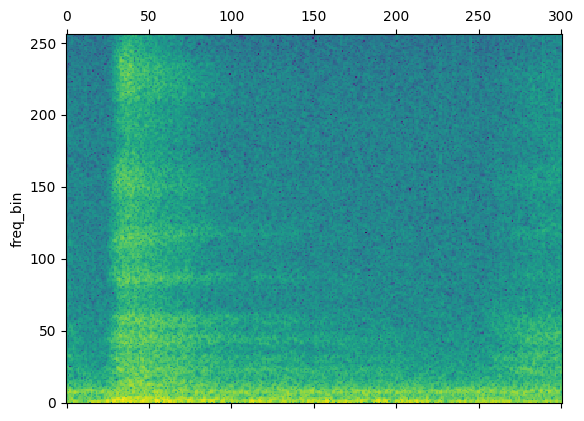

In [19]:
dataset = MySpecgramDataset(df)
print(f"dataset: {dataset}")

# Split the dataset into train, validation, and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders for batching and shuffling
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)

# Example: Iterate through the train DataLoader
for batch in train_dataloader:
    print(batch['recording_label'], batch['isStridor'])
    plot_spectrogram(batch['signal'][0])
    break

In [20]:
cnn = resnet18('IMAGENET1K_V1')
cnn.fc = torch.nn.Linear(512, 1)
_ = summary(cnn, (3, 257, 301))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\namac/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:21<00:00, 2.14MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 129, 151]           9,408
       BatchNorm2d-2         [-1, 64, 129, 151]             128
              ReLU-3         [-1, 64, 129, 151]               0
         MaxPool2d-4           [-1, 64, 65, 76]               0
            Conv2d-5           [-1, 64, 65, 76]          36,864
       BatchNorm2d-6           [-1, 64, 65, 76]             128
              ReLU-7           [-1, 64, 65, 76]               0
            Conv2d-8           [-1, 64, 65, 76]          36,864
       BatchNorm2d-9           [-1, 64, 65, 76]             128
             ReLU-10           [-1, 64, 65, 76]               0
       BasicBlock-11           [-1, 64, 65, 76]               0
           Conv2d-12           [-1, 64, 65, 76]          36,864
      BatchNorm2d-13           [-1, 64, 65, 76]             128
             ReLU-14           [-1, 64,

In [21]:
def eval(model, dataloader):
	model.eval()
	acc = 0
	for batch in dataloader:
		bs, h, w = batch['signal'].shape
		inputs = batch['signal'].unsqueeze(1).expand(bs,3,h,w)
		with torch.no_grad():
			outputs = torch.nn.functional.sigmoid(model(inputs).squeeze(1))
		for i in range(len(batch['signal'])):
			if outputs[i].item() > 0.5:
				acc += batch['isStridor'][i]
			else:
				acc += 1.0-batch['isStridor'][i]
	return acc/len(dataloader.dataset)	

num_epochs = 25
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001, weight_decay=5e-5)

best_val_acc = 0
for epoch in range(num_epochs):
	cnn.train()
	
	closs = []
	for batch in train_dataloader:
		bs, h, w = batch['signal'].shape
		inputs = batch['signal'].unsqueeze(1).expand(bs,3,h,w)

		optimizer.zero_grad()
		outputs = torch.nn.functional.sigmoid(cnn(inputs).squeeze(1))
		loss = torch.nn.functional.binary_cross_entropy(outputs, batch['isStridor'].float())
		closs += [loss.item()]*len(batch['signal'])
		loss.backward()
		optimizer.step()

	val_acc = eval(cnn, val_dataloader)
	print('Epoch:{} TrainLoss:{:.4f} TrainACC:{:.4f} ValACC:{:.4f}'.format(epoch+1, sum(closs)/len(closs), eval(cnn, train_dataloader), val_acc))

	if val_acc > best_val_acc:
		best_val_acc = val_acc
		torch.save(cnn.state_dict(), './my_resnet_model.pth')
		print('Saved!')

Epoch:1 TrainLoss:0.7467 TrainACC:0.6493 ValACC:0.6528
Saved!
Epoch:2 TrainLoss:0.6441 TrainACC:0.6979 ValACC:0.6528
Epoch:3 TrainLoss:0.6130 TrainACC:0.6892 ValACC:0.6806
Saved!
Epoch:4 TrainLoss:0.5785 TrainACC:0.6632 ValACC:0.6667
Epoch:5 TrainLoss:0.5625 TrainACC:0.6753 ValACC:0.6944
Saved!
Epoch:6 TrainLoss:0.5757 TrainACC:0.6736 ValACC:0.7361
Saved!
Epoch:7 TrainLoss:0.5314 TrainACC:0.6163 ValACC:0.6389
Epoch:8 TrainLoss:0.5355 TrainACC:0.7431 ValACC:0.6667
Epoch:9 TrainLoss:0.4932 TrainACC:0.7882 ValACC:0.6528
Epoch:10 TrainLoss:0.5248 TrainACC:0.6771 ValACC:0.7222
Epoch:11 TrainLoss:0.4602 TrainACC:0.7500 ValACC:0.6528
Epoch:12 TrainLoss:0.4503 TrainACC:0.7969 ValACC:0.7361
Epoch:13 TrainLoss:0.4447 TrainACC:0.8524 ValACC:0.6528
Epoch:14 TrainLoss:0.4123 TrainACC:0.7656 ValACC:0.6111
Epoch:15 TrainLoss:0.3692 TrainACC:0.8177 ValACC:0.7083
Epoch:16 TrainLoss:0.3884 TrainACC:0.7760 ValACC:0.6944
Epoch:17 TrainLoss:0.3519 TrainACC:0.6736 ValACC:0.6111
Epoch:18 TrainLoss:0.3560 Tra

In [22]:
cnn.load_state_dict(torch.load('./my_resnet_model.pth'))
test_acc = eval(cnn, test_dataloader)
print('TestACC:{:.4f}'.format(test_acc))

TestACC:0.6986


In [24]:
cnn.eval()
acc = [0, 0]
total = [0, 0]
for batch in test_dataloader:
	bs, h, w = batch['signal'].shape
	inputs = batch['signal'].unsqueeze(1).expand(bs,3,h,w)
	with torch.no_grad():
		outputs = torch.nn.functional.sigmoid(cnn(inputs).squeeze(1))
	for i in range(len(batch['signal'])):
		total[int(batch['isStridor'][i])] += 1
		if outputs[i].item() > 0.5:
			acc[int(batch['isStridor'][i])] += batch['isStridor'][i]
		else:
			acc[int(batch['isStridor'][i])] += 1.0-batch['isStridor'][i]

print('Class #0 ({}) ACC:{:.4f} Class #1 ({}) ACC:{:.4f}'.format(total[0], acc[0]/total[0], total[1], acc[1]/total[1]))

Class #0 (32) ACC:0.5938 Class #1 (41) ACC:0.7805
